<a href="https://colab.research.google.com/github/jmamath/DFL-Contributions/blob/master/Expectation_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
## We want to estimate the gradient of the expecation of x^2
# with respect to x ~ N(mu,1).

# Log derivative trick
def log_derivative_trick(mu , n_sample):
    """ log derivative trick or log score estimator 
    We estimate an E[x^2] with x ~ normal distribution N(mu,1)
    given a certain amount of samples
    
    Args:
        mu: Float. Mean of the normal under the expectation
        n_sample: Int. Number of element to sample """
    x = np.random.normal(loc=mu, scale=1, size = n_sample)
    gradient = np.power(x,2) * (x-mu)
    estimate = np.mean(gradient)     
    var = np.var(gradient)
    return estimate, var


Text(0.5, 1.0, 'Log derivative  trick')

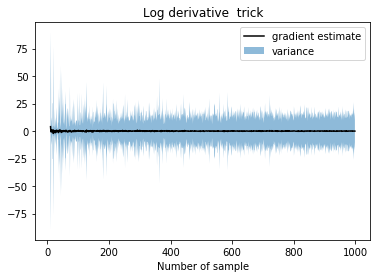

In [3]:
# Simulate the expectation with 10 to 1000 samples
range_sample = list(range(10,1000))

log_derivative = np.array([log_derivative_trick(0, sample) for sample in range_sample])

plt.fill_between(range_sample, -log_derivative[:,1], log_derivative[:,1],alpha=.5, label="variance")
plt.plot(range_sample, log_derivative[:,0], color='k', markersize=1, label="gradient estimate")
plt.xlabel("Number of sample")
plt.legend()
plt.title("Log derivative  trick")

Text(0.5, 1.0, 'Reparametrization trick')

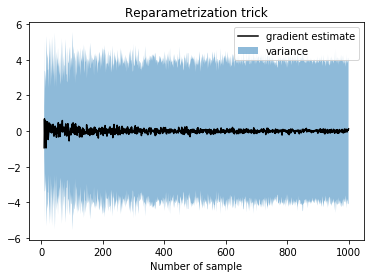

In [4]:
# Reparametrization trick
def reparametrization_trick(mu , n_sample):
    """ reparametrization trick
    We estimate an E[x^2] with x ~ normal distribution N(mu,1)
    given a certain amount of samples    
    Args:
        mu: Float. Mean of the normal under the expectation
        n_sample: Int. Number of element to sample """
    eps = np.random.normal(loc=0, scale=1, size = n_sample)
    gradient = 2*(mu+eps)
    estimate = np.mean(gradient)     
    var = np.var(gradient)
    return estimate, var

range_sample = list(range(10,1000))
reparametrization = np.array([reparametrization_trick(0, sample) for sample in range_sample])


plt.fill_between(range_sample, -reparametrization[:,1], reparametrization[:,1],alpha=.5, label="variance")
plt.plot(range_sample, reparametrization[:,0], color='k', markersize=1, label="gradient estimate")
plt.xlabel("Number of sample")
plt.legend()
plt.title("Reparametrization trick")

